___
# Ciência dos Dados - PROJETO 1

## Milena Maluli

## Segurança Alimentar no Brasil

___
## Introdução

Esse estudo pretende analisar a relação da casa dos brasileiros com sua segurança alimentar. O material, a ocupação,a  presença de geladeira e água canalizada são alguns aspectos da moradia que estão sendo analizados.
Alêm deles, é visto também a renda desses moradores e se eles ja deixaram de comprar comida por falta de alimento.

Em 2009 o PIB brasileiro sofreu uma retração de 0,2%, devido a crise mundial. Já em 2013, o PIB cresceu em 2,3%. A comparação da segurança alimentar nesses dois periodos permite averiguar as interferências da economia na vida da população, e se realmente as condições das pessoas tenham melhorado e a segurança alimentar aumentada. 

Na análise, usei os valores de renda, vi as rendas menores que 500000 reais, e o valor máximo era de 94669 reais, assim, determinei como limite de renda o 100000 reais. Também foi levado em conta que a população que a PNAD atingiu na pesquisa


Perfil da falta de alimento:  
MATERIAL DA CASA X FALTA DA ALIMENTO POR DINHEIRO
RENDA X FALTA DE ALIMENTO POR DINHEIRO
GELADEIRA X FOME
OCUPAÇÃO X RENDA
RENDA X ÁGUA + GELADEIRA




___
## Análise e Resultados

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [4]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\milen\OneDrive\Documentos\2o SEMESTRE\CDD\CD


In [5]:
#Se usar o arquivo descompactado
#pd.read_csv('DOM2009.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
dados=pd.read_csv('DOM2009csv.zip', compression='zip', header=0, sep=',', quotechar='"')

dados2=pd.read_csv('DOM2013csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [6]:
#2009
dados.V4621 = dados.V4621.astype('float')

#dados.V0202 = dados.V0202.astype('category')
dados.V2117 = dados.V2117.astype('category')

dados.V2132 = dados.V2132.astype('category')

dados.V0203 = dados.V0203.astype('category')

dados.V0221 = dados.V0221.astype('category')

dados.V0207 = dados.V0207.astype('category')

dados.V2105 = dados.V2105.astype('category')

dados.V0228 = dados.V0228.astype('category')

In [7]:
#2013

dados2.V4621 = dados.V4621.astype('float')

#dados.V0202 = dados.V0202.astype('category')
dados2.V2117 = dados.V2117.astype('category')

dados2.V2132 = dados.V2132.astype('category')

dados2.V0203 = dados.V0203.astype('category')

dados2.V0221 = dados.V0221.astype('category')

dados2.V0207 = dados.V0207.astype('category')

dados2.V2105 = dados.V2105.astype('category')

dados2.V0228 = dados.V0228.astype('category')

In [8]:
#2009

#dados.V0202.cat.categories = (['Casa', 'Ap','Dom'])
dados.V2117.cat.categories = (['Sim', 'Nao'])
dados.V2132.cat.categories = (['Sim', 'Nao'])
dados.V0203.cat.categories = (['Alven', 'Mad Aparelhada', 'Taipa','Mad Aproveitada','Palha','Outro Material'])
dados.V0221.cat.categories = (['Sim', 'Nao'])
dados.V0207.cat.categories = (['Próprio PAGO', 'Próprio', 'Alugado','Cedido por empregador','Cedido','Outro'])
dados.V2105.cat.categories = (['Sim', 'Nao'])
dados.V0228.cat.categories = (['Sim, 2portas', 'Sim, 1porta','Nao'])
dados.V2117.cat.categories = (['Sim', 'Nao'])
#dados.V2132.cat.categories = (['Sim', 'Nao']) so p quem tem menos de 17, tirei

In [9]:
#2013

#dados.V0202.cat.categories = (['Casa', 'Ap','Dom'])
dados2.V2117.cat.categories = (['Sim', 'Nao'])
dados2.V2132.cat.categories = (['Sim', 'Nao'])
dados2.V0203.cat.categories = (['Alven', 'Mad Aparelhada', 'Taipa','Mad Aproveitada','Palha','Outro Material'])
dados2.V0221.cat.categories = (['Sim', 'Nao'])
dados2.V0207.cat.categories = (['Próprio PAGO', 'Próprio', 'Alugado','Cedido por empregador','Cedido','Outro'])
dados2.V2105.cat.categories = (['Sim', 'Nao'])
dados2.V0228.cat.categories = (['Sim, 2portas', 'Sim, 1porta','Nao'])
dados2.V2117.cat.categories = (['Sim', 'Nao'])
#dados.V2132.cat.categories = (['Sim', 'Nao']) so p quem tem menos de 17, tirei

In [10]:

#dados.loc[(dados.V2117=='Sim') & (dados.V2132=='Sim'),'SENTIUFOME'] = 'Sim'
#dados.loc[(dados.V2117=='Nao') | (dados.V2132=='Nao'),'SENTIUFOME'] = 'Nao'

In [11]:
d= dados.loc[:,["V4621","V0207","V0203","V0221","V0228","V2117","V2105"]]
d2=dados2.loc[:,["V4621","V0207","V0203","V0221","V0228","V2117","V2105"]]

In [12]:
print('2009')
d.columns = ['RENDA','OCUPAÇÃO','MATERIAL', 'AGUA', 'GELADEIRA','SENTIUFOME','FALTAAL']
d=d.dropna(subset=['RENDA'])
d=d[d.RENDA<100000]
d.head()

2009


,RENDA,OCUPAÇÃO,MATERIAL,AGUA,GELADEIRA,SENTIUFOME,FALTAAL
2,118.0,Próprio PAGO,Mad Aproveitada,Sim,"Sim, 1porta",Sim,Sim
3,1053.0,Próprio PAGO,Alven,Sim,"Sim, 2portas",NaN,Nao
4,930.0,Próprio PAGO,Alven,Sim,"Sim, 1porta",NaN,Nao
6,232.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 1porta",NaN,Nao
7,248.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 2portas",NaN,Nao


In [13]:
print('2013')
d2.columns = ['RENDA','OCUPAÇÃO','MATERIAL', 'AGUA', 'GELADEIRA','SENTIUFOME','FALTAAL']
d2=d2.dropna(subset=['RENDA'])
d2=d2[d2.RENDA<100000]
d2.head()

2013


,RENDA,OCUPAÇÃO,MATERIAL,AGUA,GELADEIRA,SENTIUFOME,FALTAAL
2,118.0,Próprio PAGO,Mad Aproveitada,Sim,"Sim, 1porta",Sim,Sim
3,1053.0,Próprio PAGO,Alven,Sim,"Sim, 2portas",NaN,Nao
4,930.0,Próprio PAGO,Alven,Sim,"Sim, 1porta",NaN,Nao
6,232.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 1porta",NaN,Nao
7,248.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 2portas",NaN,Nao


In [14]:
d.to_csv('DataFramee1.csv', sep=';')


### MATERIAL DA CASA X FALTA DA ALIMENTO POR DINHEIRO


Qual a relação do material da casa e a quantidade de pessoas que tem falta de alimento por não poder comprar? 
Tem casas feitas de material mais caro mas que mesmo assim sente falta por não ter dinheiro?
Qual o material de casa em que mais ocorre a falta por dinheiro?

Falta al por $         Sim        Nao
MATERIAL                             
Alven            16.683853  83.316147
Mad Aparelhada   20.882921  79.117079
Taipa            53.185328  46.814672
Mad Aproveitada  37.795276  62.204724
Palha            38.888889  61.111111
Outro Material   34.391534  65.608466
All              17.532042  82.467958


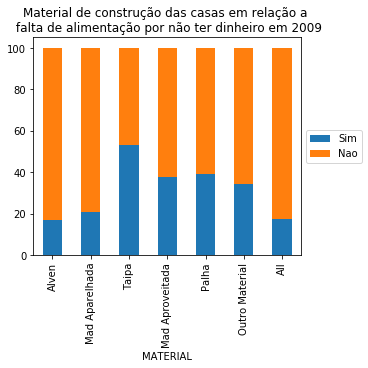

In [15]:
ctrf= (pd.crosstab(d.MATERIAL,d.FALTAAL,margins=True,rownames=['MATERIAL'], colnames=['Falta al por $'], normalize='index')*100)
print(ctrf)
ctrf.plot(kind='bar', stacked=True)
plt.title('Material de construção das casas em relação a \n falta de alimentação por não ter dinheiro em 2009')

#plt.subplot(131) numero de linhas, colunas, e posição do gráfico. ajuda na comparação

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


Falta al por $         Sim        Nao
MATERIAL                             
Alven            16.857238  83.142762
Mad Aparelhada   20.904645  79.095355
Taipa            53.236715  46.763285
Mad Aproveitada  37.634409  62.365591
Palha            38.888889  61.111111
Outro Material   34.574468  65.425532
All              17.715338  82.284662


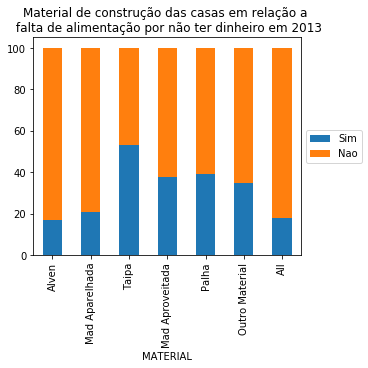

In [16]:
ctrf2= (pd.crosstab(d2.MATERIAL,d2.FALTAAL,margins=True,rownames=['MATERIAL'], colnames=['Falta al por $'], normalize='index')*100)
print(ctrf2)
ctrf2.plot(kind='bar', stacked=True)
plt.title('Material de construção das casas em relação a \n falta de alimentação por não ter dinheiro em 2013')

#plt.subplot(131) numero de linhas, colunas, e posição do gráfico. ajuda na comparação

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


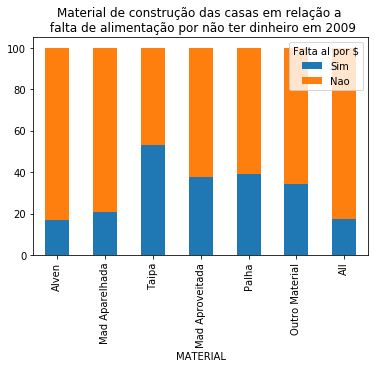

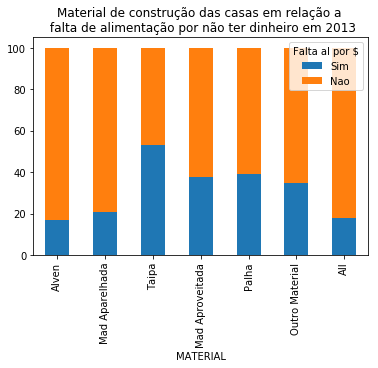

In [17]:
#Comparação
ctrf= (pd.crosstab(d.MATERIAL,d.FALTAAL,margins=True,rownames=['MATERIAL'], colnames=['Falta al por $'], normalize='index')*100)
ctrf.plot(kind='bar', stacked=True)
plt.title('Material de construção das casas em relação a \n falta de alimentação por não ter dinheiro em 2009')

ctrf2= (pd.crosstab(d2.MATERIAL,d2.FALTAAL,margins=True,rownames=['MATERIAL'], colnames=['Falta al por $'], normalize='index')*100)
ctrf2.plot(kind='bar', stacked=True)
plt.title('Material de construção das casas em relação a \n falta de alimentação por não ter dinheiro em 2013')

### RENDA X FALTA DE ALIMENTO POR DINHEIRO

Relação da Renda e falta de alimento por dinheiro.
Quanto maior a renda, menor a falta de alimento por dinheiro?

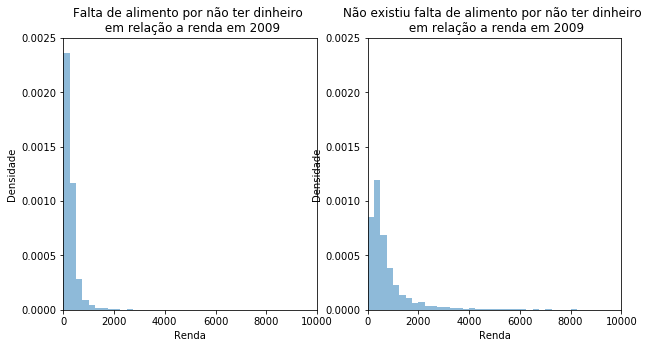

In [18]:
faixa = arange(0,100000,250)

plt.subplot(121)
plot = d.RENDA[d.FALTAAL=='Sim'].plot.hist(bins=faixa,title='HISTOGRAMA FALTAAL',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)
plt.title('Falta de alimento por não ter dinheiro \n em relação a renda em 2009')

plt.subplot(122)
plot = d.RENDA[d.FALTAAL=='Nao'].plot.hist(bins=faixa,title='HISTOGRAMA SEM FALTAAL',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)
plt.title('Não existiu falta de alimento por não ter dinheiro \n em relação a renda em 2009')

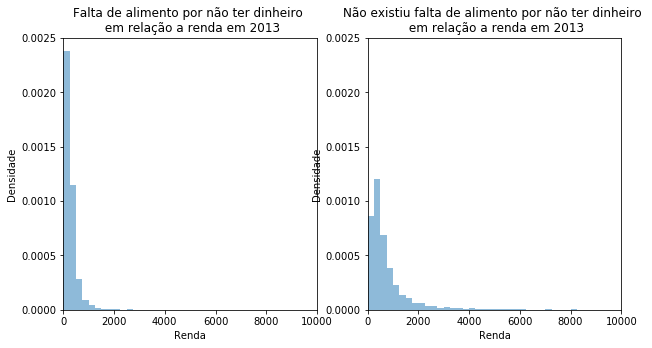

In [19]:
faixa = arange(0,100000,250)

plt.subplot(121)
plot = d2.RENDA[d2.FALTAAL=='Sim'].plot.hist(bins=faixa,title='HISTOGRAMA FALTAAL',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)
plt.title('Falta de alimento por não ter dinheiro \n em relação a renda em 2013')

plt.subplot(122)
plot = d2.RENDA[d2.FALTAAL=='Nao'].plot.hist(bins=faixa,title='HISTOGRAMA SEM FALTAAL',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)
plt.title('Não existiu falta de alimento por não ter dinheiro \n em relação a renda em 2013')

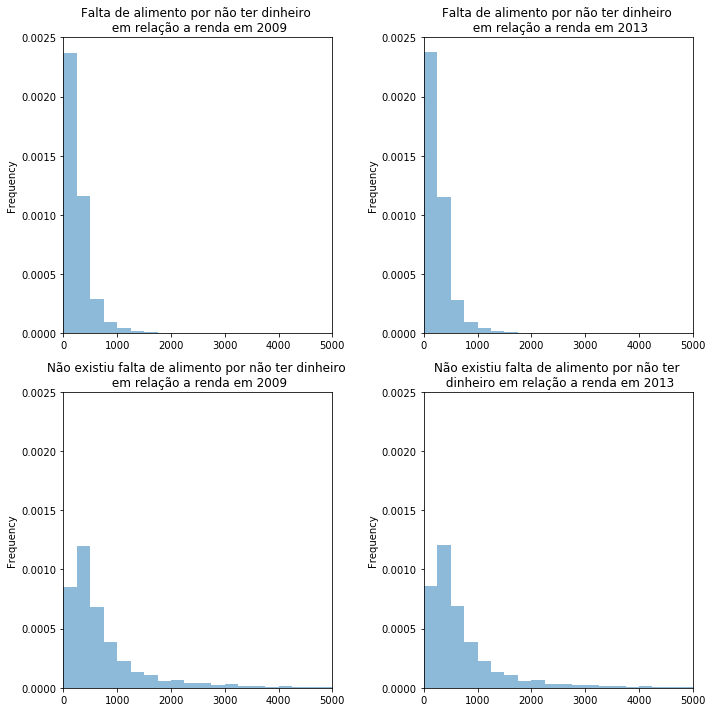

In [20]:
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plot = d.RENDA[d.FALTAAL=='Sim'].plot.hist(bins=faixa,title='Falta de alimento por não ter dinheiro \n em relação a renda em 2009', normed=1, alpha=0.5)
plt.ylim(0,0.0025)
plt.xlim(0,5000)


plt.subplot(222)
plot = d2.RENDA[d2.FALTAAL=='Sim'].plot.hist(bins=faixa,title='Falta de alimento por não ter dinheiro \n em relação a renda em 2013', normed=1, alpha=0.5)
plt.ylim(0,0.0025)
plt.xlim(0,5000)


plt.subplot(223)
plot = d.RENDA[d.FALTAAL=='Nao'].plot.hist(bins=faixa,title='Não existiu falta de alimento por não ter dinheiro \n em relação a renda em 2009', normed=1, alpha=0.5)
plt.ylim(0,0.0025)
plt.xlim(0,5000)


plt.subplot(224)
plot = d2.RENDA[d2.FALTAAL=='Nao'].plot.hist(bins=faixa,title='Não existiu falta de alimento por não ter \n dinheiro em relação a renda em 2013',normed=1, alpha=0.5)
plt.ylim(0,0.0025)
plt.xlim(0,5000)

plt.tight_layout()
plt.show()

### RENDA  X   ÁGUA + GELADEIRA

In [25]:
#INFRAESTRUTURA

d.loc[(d.AGUA=='Sim') & (d.GELADEIRA=='Sim, 2portas'),'INFRAESTRUTURA'] = 'Sim'
d.loc[(d.AGUA=='Sim') & (d.GELADEIRA=='Sim, 1porta'),'INFRAESTRUTURA'] = 'Sim'
d.loc[(d.AGUA=='Nao') | (d.GELADEIRA=='Nao'),'INFRAESTRUTURA'] = 'Nao'
d.head()

,RENDA,OCUPAÇÃO,MATERIAL,AGUA,GELADEIRA,SENTIUFOME,FALTAAL,INFRAESTRUTURA
2,118.0,Próprio PAGO,Mad Aproveitada,Sim,"Sim, 1porta",Sim,Sim,Sim
3,1053.0,Próprio PAGO,Alven,Sim,"Sim, 2portas",NaN,Nao,Sim
4,930.0,Próprio PAGO,Alven,Sim,"Sim, 1porta",NaN,Nao,Sim
6,232.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 1porta",NaN,Nao,Sim
7,248.0,Próprio PAGO,Mad Aparelhada,Sim,"Sim, 2portas",NaN,Nao,Sim


In [26]:
#RENDA
d.RENDA.describe()

count    117827.000000
mean        760.880605
std        1355.601794
min           0.000000
25%         232.000000
50%         451.000000
75%         797.000000
max       94669.000000
Name: RENDA, dtype: float64

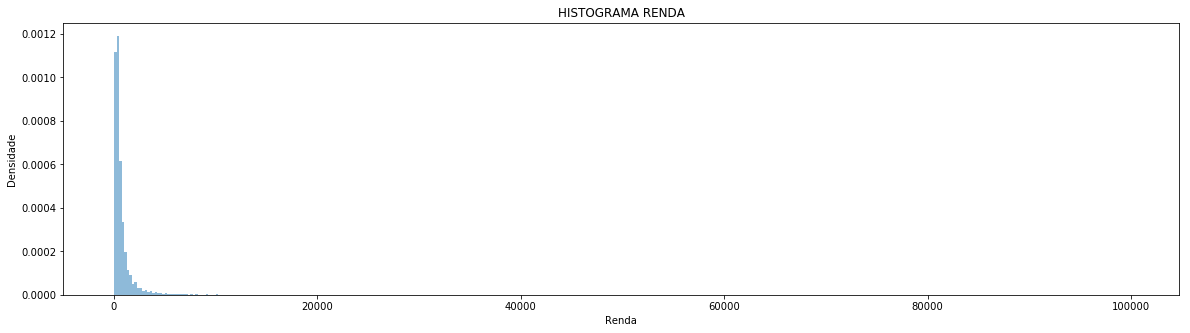

In [27]:
# k= raiz de 121163 = 348 = 350
# amplitude= 94669
#270 
faixa = arange(0,100000,250)

plot = d.RENDA.plot.hist(bins=faixa,title='HISTOGRAMA RENDA',figsize=(20,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')


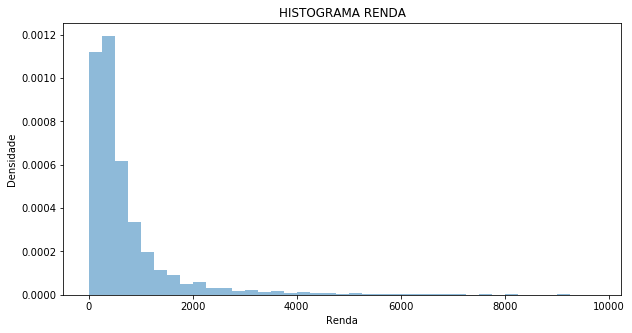

In [28]:
faixa = arange(0,10000,250)

plot = d.RENDA.plot.hist(bins=faixa,title='HISTOGRAMA RENDA',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')

(0, 10000)

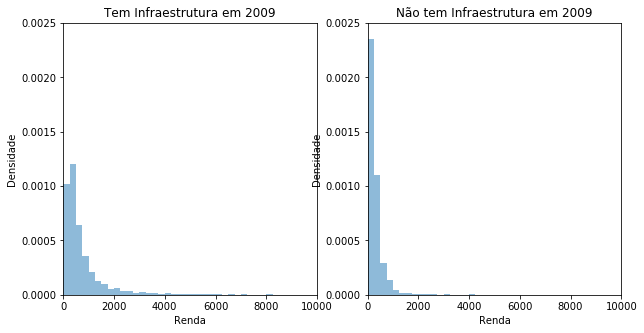

In [29]:

plt.subplot(121)
plot = d.RENDA[d.INFRAESTRUTURA=='Sim'].plot.hist(bins=faixa,title='Tem Infraestrutura em 2009',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)


plt.subplot(122)
plot = d.RENDA[d.INFRAESTRUTURA=='Nao'].plot.hist(bins=faixa,title='Não tem Infraestrutura em 2009',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)

(0, 10000)

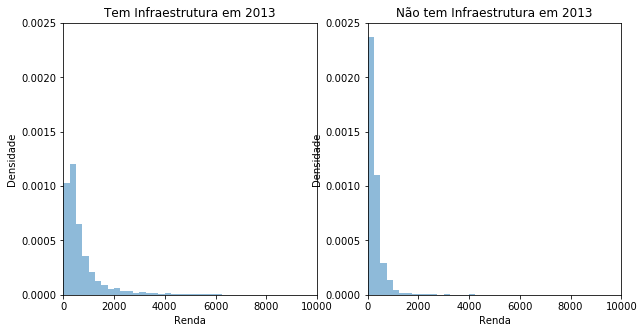

In [30]:
d2.loc[(d2.AGUA=='Sim') & (d2.GELADEIRA=='Sim, 2portas'),'INFRAESTRUTURA'] = 'Sim'
d2.loc[(d2.AGUA=='Sim') & (d2.GELADEIRA=='Sim, 1porta'),'INFRAESTRUTURA'] = 'Sim'
d2.loc[(d2.AGUA=='Nao') | (d2.GELADEIRA=='Nao'),'INFRAESTRUTURA'] = 'Nao'
d2.head()


plt.subplot(121)
plot = d2.RENDA[d.INFRAESTRUTURA=='Sim'].plot.hist(bins=faixa,title='Tem Infraestrutura em 2013',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)

plt.subplot(122)
plot = d2.RENDA[d.INFRAESTRUTURA=='Nao'].plot.hist(bins=faixa,title='Não tem Infraestrutura em 2013',figsize=(10,5), normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,10000)

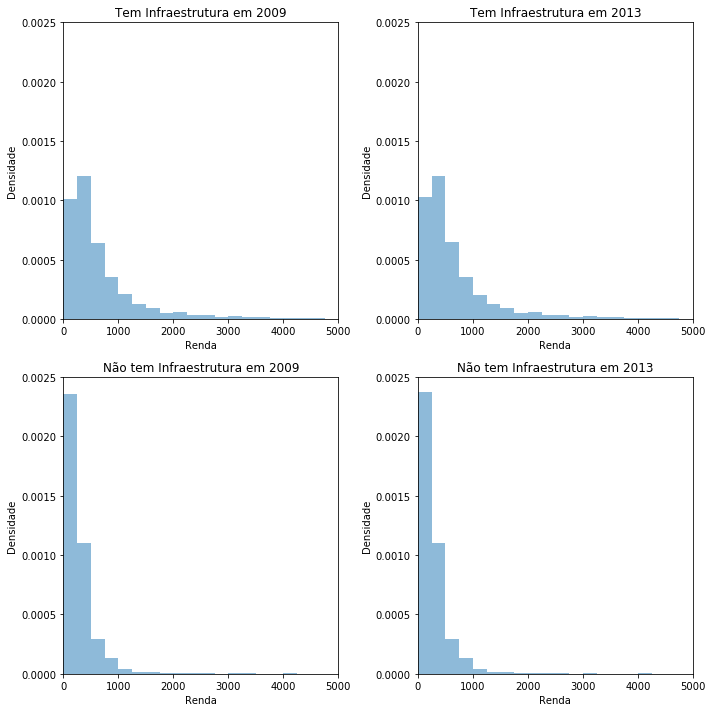

In [52]:
fig = plt.figure(figsize=(10,10))

plt.subplot(221)
plot = d.RENDA[d.INFRAESTRUTURA=='Sim'].plot.hist(bins=faixa,title='Tem Infraestrutura em 2009', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,5000)

plt.subplot(222)
plot = d2.RENDA[d.INFRAESTRUTURA=='Sim'].plot.hist(bins=faixa,title='Tem Infraestrutura em 2013', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,5000)

plt.subplot(223)
plot = d.RENDA[d.INFRAESTRUTURA=='Nao'].plot.hist(bins=faixa,title='Não tem Infraestrutura em 2009', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,5000)

plt.subplot(224)
plot = d2.RENDA[d.INFRAESTRUTURA=='Nao'].plot.hist(bins=faixa,title='Não tem Infraestrutura em 2013', normed=1, alpha=0.5)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.ylim(0,0.0025)
plt.xlim(0,5000)


plt.tight_layout()
plt.show()

### FOME X INFRAESTRUTURA

In [50]:
d.SENTIUFOME.value_counts()

Nao    30264
Sim     7415
Name: SENTIUFOME, dtype: int64

Sentiu fome?                      Sim        Nao
Presença de Infraestrutura                      
Nao                         36.108263  63.891737
Sim                         17.183297  82.816703
All                         19.638724  80.361276


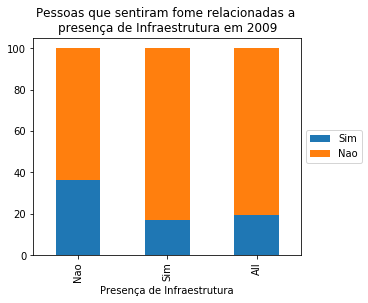

In [38]:
ctgf= (pd.crosstab(d.INFRAESTRUTURA,d.SENTIUFOME,margins=True,rownames=['Presença de Infraestrutura'], colnames=['Sentiu fome?'], normalize='index')*100)
print(ctgf)
ctgf.plot(kind='bar', stacked=True)
plt.title('Pessoas que sentiram fome relacionadas a \npresença de Infraestrutura em 2009')

#plt.subplot(131) numero de linhas, colunas, e posição do gráfico. ajuda na comparação

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Sentiu fome?                      Sim        Nao
Presença de Infraestrutura                      
Nao                         36.158309  63.841691
Sim                         17.288765  82.711235
All                         19.775029  80.224971


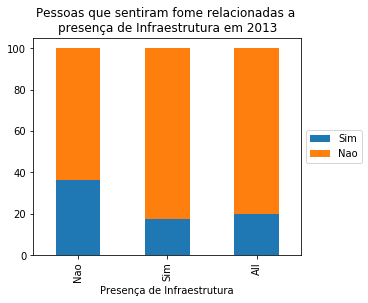

In [40]:
ctgf2= (pd.crosstab(d2.INFRAESTRUTURA,d2.SENTIUFOME,margins=True,rownames=['Presença de Infraestrutura'], colnames=['Sentiu fome?'], normalize='index')*100)
print(ctgf2)
ctgf2.plot(kind='bar', stacked=True)
plt.title('Pessoas que sentiram fome relacionadas a \npresença de Infraestrutura em 2013')

#plt.subplot(131) numero de linhas, colunas, e posição do gráfico. ajuda na comparação

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

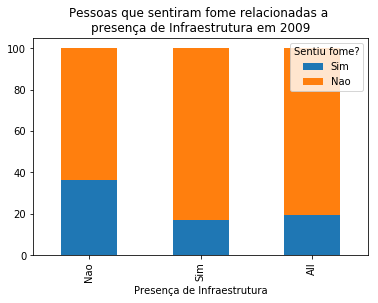

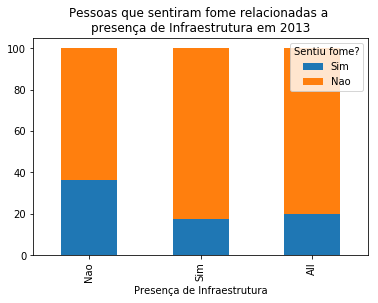

In [49]:
ctgf= (pd.crosstab(d.INFRAESTRUTURA,d.SENTIUFOME,margins=True,rownames=['Presença de Infraestrutura'], colnames=['Sentiu fome?'], normalize='index')*100)
ctgf.plot(kind='bar', stacked=True)
plt.title('Pessoas que sentiram fome relacionadas a \npresença de Infraestrutura em 2009')

ctgf2= (pd.crosstab(d2.INFRAESTRUTURA,d2.SENTIUFOME,margins=True,rownames=['Presença de Infraestrutura'], colnames=['Sentiu fome?'], normalize='index')*100)
ctgf2.plot(kind='bar', stacked=True)
plt.title('Pessoas que sentiram fome relacionadas a \npresença de Infraestrutura em 2013')




___
## Conclusão 

Descreva aqui suas conclusões!

MATERIAL DA CASA X FALTA DA ALIMENTO POR DINHEIRO
RENDA X FALTA DE ALIMENTO POR DINHEIRO
GELADEIRA X FOME
OCUPAÇÃO X RENDA
RENDA X ÁGUA + GELADEIRA

"Dados do suplemento da Pesquisa Nacional de Amostras de Domicílios (Pnad) 2013 sobre Segurança Alimentar apontam que 7,2 milhões de brasileiros enfrentaram no ano passado situação grave de privação de alimentos, incluindo experiência de fome. O total é 35,7% menor que o registrado em 2009, quando foi realizada a última Pnad pelo Instituto Brasileiro de Geografia e Estatística (IBGE) e constatou 11,2 milhões de pessoas nesta situação. As informações foram divulgadas nesta quinta-feira (18)."
